In [1]:
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import KFold
import word_preprocess
import csv
from sklearn.ensemble import VotingClassifier
from sklearn import linear_model
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

K-fold validation function

In [2]:
def K_fold_validation(X, y, model, fold_size):
    kf = KFold(n_splits=fold_size)
    kf.get_n_splits(X)
    acc = []
    
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        
        score = model.fit(X_train, y_train).score(X_test, y_test)
        print(score)
        acc.append(score)
        
    return np.mean(acc)

In [3]:
original_data = pd.read_csv("reddit_train.csv")
testData = pd.read_csv("reddit_test.csv")
testData = testData.drop(columns="id")

Preprocess data

In [4]:
tv = TfidfVectorizer(sublinear_tf=True, min_df=2, smooth_idf=True)
X = tv.fit_transform(original_data.comments)

In [5]:
y = original_data["subreddits"]
le = preprocessing.LabelEncoder()
le.fit(y)
labels = le.transform(y)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

SGD, MNB, SVC and LR model tests

In [54]:
sgd = linear_model.SGDClassifier(loss='modified_huber', alpha=0.000068)
sgd.fit(X_train, y_train).score(X_test, y_test)

0.5715714285714286

In [25]:
mnb = MultinomialNB(alpha=0.4)
mnb.fit(X_train, y_train).score(X_test, y_test)

0.5768571428571428

In [10]:
svc = LinearSVC(dual = False)
svc.fit(X_train, y_train).score(X_test, y_test)

0.5537142857142857

In [13]:
lr = LogisticRegression()
lr.fit(X_train, y_train).score(X_test, y_test)

0.552

In [6]:
cv = CountVectorizer(min_df=2, strip_accents='unicode')
X_counts = cv.fit_transform(original_data.comments)
tt = TfidfTransformer(smooth_idf=True, sublinear_tf=True)
X = tt.fit_transform(X_counts)

X_final_test_counts = cv.transform(testData["comments"])
X_final_test = tt.transform(X_final_test_counts)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


Voting classifier with best models

In [59]:
mnb = MultinomialNB(alpha=0.22)
mnb2 = MultinomialNB(alpha=0.15)
sgd = linear_model.SGDClassifier(loss='modified_huber', alpha=0.00012)
sgd2 = linear_model.SGDClassifier(loss='modified_huber', alpha=0.00025)
sgd3 = linear_model.SGDClassifier(loss='modified_huber', alpha=0.00032)

eclf1 = VotingClassifier(estimators=[('sgd3', sgd3), ('sgd2', sgd2), ('sgd', sgd), ('mnb', mnb), ('mnb2', mnb2)], voting='soft', weights=[0.5,1,3,3.5,1])

y_out = eclf1.fit(X, y).predict(X_final_test)

print to csv file

In [142]:
with open('test.csv',mode='w', newline='') as fw:
    writer = csv.writer(fw, delimiter=',')
    writer.writerow(['id', 'Category'])
    for i,row in enumerate(y_out):
        writer.writerow([i, row])

plot different alphas

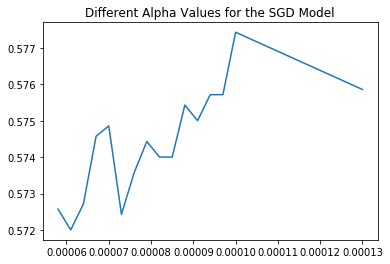

In [42]:
accuracy = [0]*16
alpha = [0.000058, 0.000061, 0.000064, 0.000067, 0.00007, 0.000073, 0.000076, 0.000079, 0.000082, 0.000085, 0.000088, 0.000091, 0.000094, 0.000097, 0.0001, 0.00013]
n = 0
for i in alpha:
    accuracy[n] = linear_model.SGDClassifier(loss='modified_huber', alpha=i).fit(X_train, y_train).score(X_test, y_test)
    n=n+1
    

plt.plot(alpha, accuracy)
plt.title("Different Alpha Values for the SGD Model")
plt.show()